In [1]:
# pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

### Convert Model to tflite format


In [3]:
h5_model_name = 'vegetable_classification_model.h5'
model = keras.models.load_model(h5_model_name)

In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('vegetable_classification_model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ARUN\AppData\Local\Temp\tmptncoyqt3\assets


INFO:tensorflow:Assets written to: C:\Users\ARUN\AppData\Local\Temp\tmptncoyqt3\assets


### Test the Model 

In [5]:
import tensorflow.lite as tflite
from tensorflow.keras.preprocessing import image

In [6]:
classes = ['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

### Load and preprocess the test image

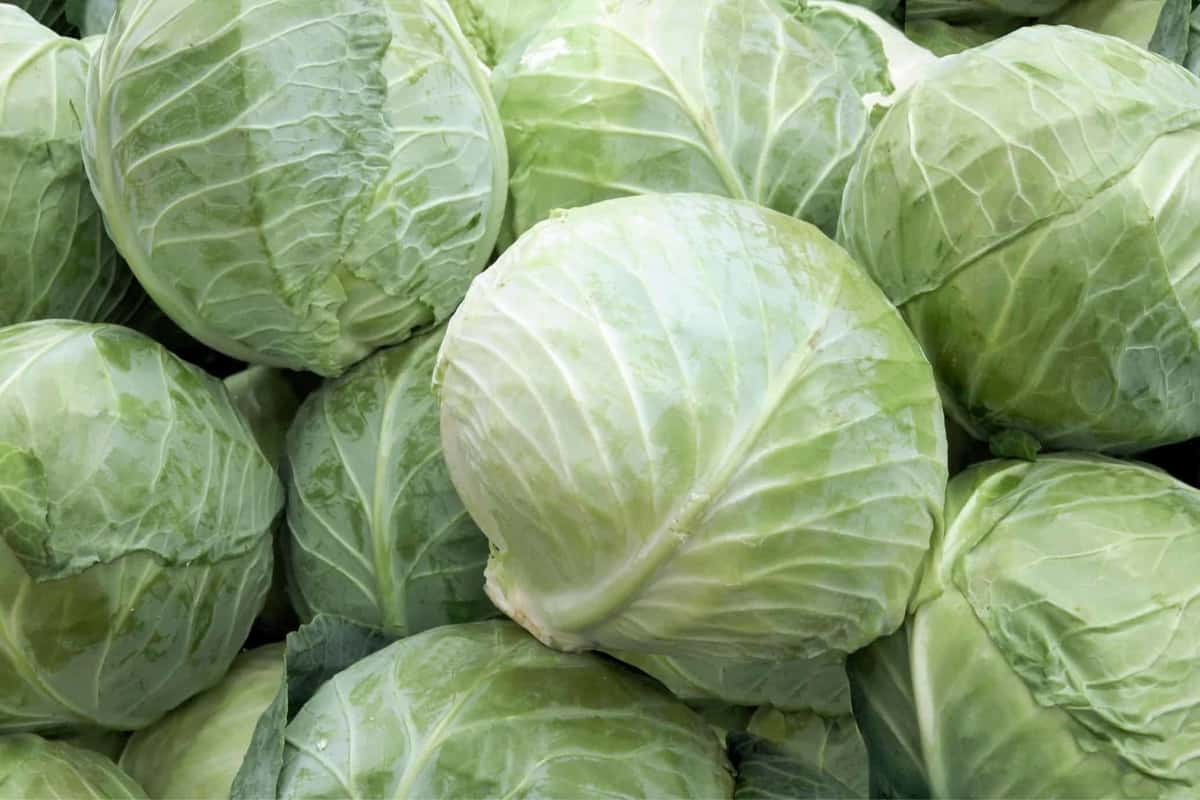

In [7]:
# Load and preprocess the test image
import requests
from PIL import Image
from io import BytesIO
import numpy as np
# from tflite_runtime.interpreter import Interpreter
from tensorflow.keras.preprocessing import image as keras_image

# URL of the image on the web
# image_url = "https://thefarmatgreenvillage.com/wp-content/uploads/2018/05/heirloom-tomatoes.jpg"
# image_url = "https://1.bp.blogspot.com/-o3BArH9Lq1M/XPm3DJcx8aI/AAAAAAAAJSA/_zzUjuGx9k8-lTu0B9hYvtOVogOYEch7ACLcBGAs/s1600/p7_Broccoli_HH1812_gi905351392.jpg"
# image_url = "https://2.bp.blogspot.com/-cBd91Z2JeqI/WZjDCgEp0kI/AAAAAAAAh0E/DHKnckBY6ZUB1xkU_nEql7LuXCPZ-_ypACLcBGAs/s640/214.png"
image_url = "https://s3.amazonaws.com/com.niches.production/story_images/new_images/000/004/694/width_1200/how-much-is-in-a-cabbage-2.jpg?1631638990"

# Download the image from the web
response = requests.get(image_url)
image_data = BytesIO(response.content)

# Load the image using PIL (Python Imaging Library)
img = Image.open(image_data)

img


In [8]:
# Resize the image to match the input size expected by your model
input_size = (224, 224)  # Adjust based on your model's input size
img = img.resize(input_size)

# Convert the image to a numpy array and normalize the pixel values
x = keras_image.img_to_array(img)
x = x / 255.0  # Normalize the pixel values to the range [0, 1]
x = np.expand_dims(x, axis=0)

# Load the TensorFlow Lite model
model_path = 'vegetable_classification_model.tflite'
interpreter = tflite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Assuming the input tensor details are retrieved as follows
input_details = interpreter.get_input_details()[0]
input_index = input_details['index']

# Assuming the output tensor details are retrieved as follows
output_details = interpreter.get_output_details()[0]
output_index = output_details['index']

# Set the input tensor data
interpreter.set_tensor(input_index, x)

# Run inference
interpreter.invoke()

# Get the output tensor data
output_data = interpreter.get_tensor(output_index)

# Output the result
print("Output prediction:", output_data)

Output prediction: [[5.0437793e-10 9.3607987e-06 3.6021186e-06 8.2423358e-06 3.8467676e-04
  9.8811650e-01 5.2523745e-08 1.7496994e-17 8.7656789e-03 1.5445438e-07
  6.6538513e-07 9.1720391e-09 1.9146042e-03 3.7912503e-11 7.9657638e-04]]


### Predicted Output of top N predicted categories

In [9]:
# list of categories corresponding to the model output
categories = classes
N=4

# Get the indices of the top N values in the output_data
top_indices = np.argsort(output_data)[0, ::-1][:N]

# Map the indices to the corresponding category labels
top_categories = [categories[i] for i in top_indices]

# Output the top N predicted categories
print("Top {} predicted categories:".format(N), top_categories)

Top 4 predicted categories: ['Cabbage', 'Cauliflower', 'Pumpkin', 'Tomato']
